In [138]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from astropy.nddata import Cutout2D
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry

In [139]:
# aperture radius size to be used is 7 s
# from http://articles.adsabs.harvard.edu/pdf/1992AJ....104..340L
# nickel has 0.184 arcsec/pixel 
# that means apertures should be 7/0.184 pixels

In [140]:
print(7/0.369140625) # aperture size recommended

18.962962962962962


# ZP for B filter

In [161]:
hdul = fits.open('landolt_B_per_sec.fits') # 30 secs
landolt_B=hdul[0].data

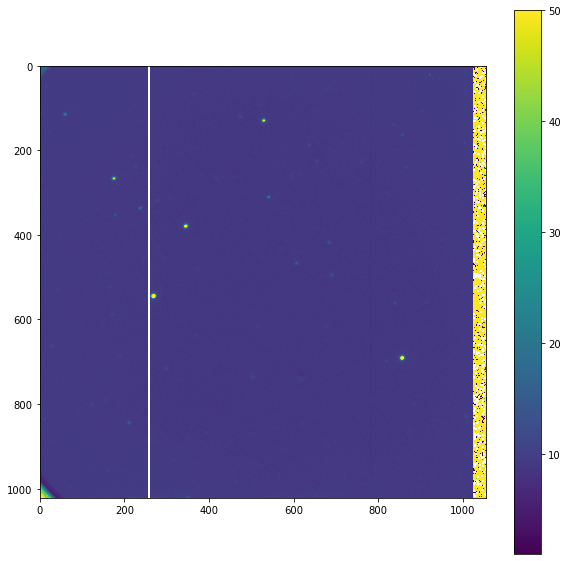

In [162]:
plt.figure(figsize=(10,10))
im=plt.imshow(landolt_B,vmin=1,vmax=50)
plt.colorbar(im)

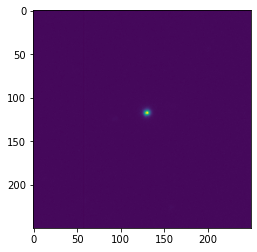

In [163]:
## analyzing star 111 1925

position = (850, 700)
size = (250, 250)     # pixels
cutout_star111_1925 = Cutout2D(landolt_B, position, size)
plt.imshow(cutout_star111_1925.data)

In [164]:



mean, median, std = sigma_clipped_stats(cutout_star111_1925.data, sigma=3.0) 
#print((mean, median, std))  

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(cutout_star111_1925.data - median)  

In [165]:
for col in sources.colnames:  
     sources[col].info.format = '%.8g'  # for consistent table output

In [166]:
print(sources)

 id xcentroid ycentroid sharpness  ... sky    peak       flux       mag     
--- --------- --------- ---------- ... --- ---------- --------- ------------
  1 55.589052 41.145044  0.3442547 ...   0 0.84812771 1.0543289 -0.057440257
  2 130.38314 117.36562 0.43888301 ...   0   162.3795 37.529398    -3.935929


In [167]:
positions = [(130.38314, 117.36562)]

aperture = CircularAperture(positions, r=18.962962962962962)

In [168]:
phot_table = aperture_photometry(cutout_star111_1925.data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)


 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 130.38314 117.36562     16344.61


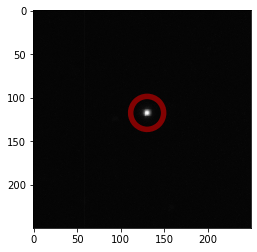

In [169]:
im=plt.imshow(cutout_star111_1925.data,cmap='Greys_r',interpolation='nearest')

aperture.plot(color='red', lw=5.5, alpha=0.5)

In [170]:
positions = [(130.38314+35, 117.36562+35)]

aperture = CircularAperture(positions, r=18.962962962962962)

phot_table = aperture_photometry(cutout_star111_1925.data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 165.38314 152.36562    10161.864


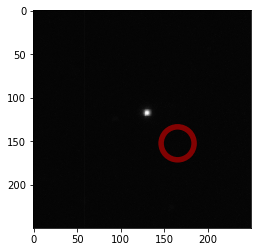

In [171]:
im=plt.imshow(cutout_star111_1925.data,cmap='Greys_r',interpolation='nearest')

aperture.plot(color='red', lw=5.5, alpha=0.5)

In [172]:
#B band mag of 111_1925 = 12.783
m_zp = 12.783 + 2.5*np.log10((16344.61-10161.864)/1.0)
print(m_zp)

22.260953512873314


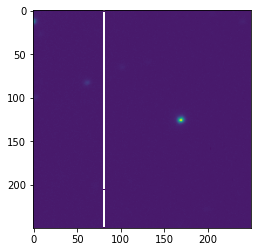

In [178]:
position = (300, 380)
size = (250, 250)     # pixels
cutout_star111_1965 = Cutout2D(landolt_B, position, size)
plt.imshow(cutout_star111_1965.data)

In [179]:
mean, median, std = sigma_clipped_stats(cutout_star111_1965.data, sigma=3.0) 
#print((mean, median, std))  

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(cutout_star111_1965.data - median)  

In [180]:
for col in sources.colnames:  
     sources[col].info.format = '%.8g'  # for consistent table output

In [181]:
print(sources)

 id xcentroid  ycentroid sharpness  ... sky    peak      flux       mag     
--- ---------- --------- ---------- ... --- --------- --------- ------------
  1 0.67876128 12.668378 0.29443394 ...   0 42.985826 17.950775    -3.135208
  2  61.837946  82.74619 0.42725315 ...   0 12.212791 2.5269407   -1.0064876
  3  2.6267508  99.13933 0.55367341 ...   0 4.9416663 1.0368464 -0.039286079
  4  169.21104 125.68173 0.46413713 ...   0 117.07575 28.132407   -3.6230172


In [182]:
positions = [(169.21104, 125.68173)]

aperture = CircularAperture(positions, r=18.962962962962962)
phot_table = aperture_photometry(cutout_star111_1965.data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)


 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 169.21104 125.68173     14378.57


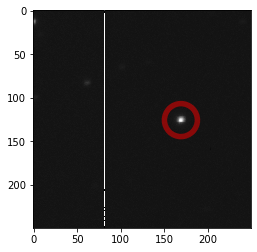

In [184]:
im=plt.imshow(cutout_star111_1965.data,cmap='Greys_r',interpolation='nearest')

aperture.plot(color='red', lw=5.5, alpha=0.5)

In [185]:
positions = [(169.21104+35, 125.68173+35)]

aperture = CircularAperture(positions, r=18.962962962962962)
phot_table = aperture_photometry(cutout_star111_1965.data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)


 id  xcenter       ycenter       aperture_sum
       pix           pix                     
--- --------- ------------------ ------------
  1 204.21104 160.68173000000002    10106.395


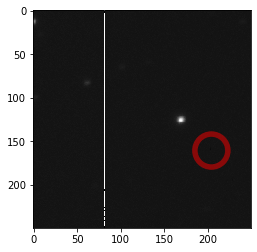

In [186]:
im=plt.imshow(cutout_star111_1965.data,cmap='Greys_r',interpolation='nearest')

aperture.plot(color='red', lw=5.5, alpha=0.5)

In [187]:
#B band mag of 111_1965 = 13.129
m_zp = 13.129 + 2.5*np.log10((14378.57-10106.395)/1.0)
print(m_zp)

22.205622585693625


In [188]:
# so zero point in B-band is 

B_zp = 0.5*(22.260953512873314 +22.205622585693625)

# ZP for V filter

In [189]:
hdul = fits.open('landolt_V_per_sec.fits') # 30 secs
landolt_V=hdul[0].data

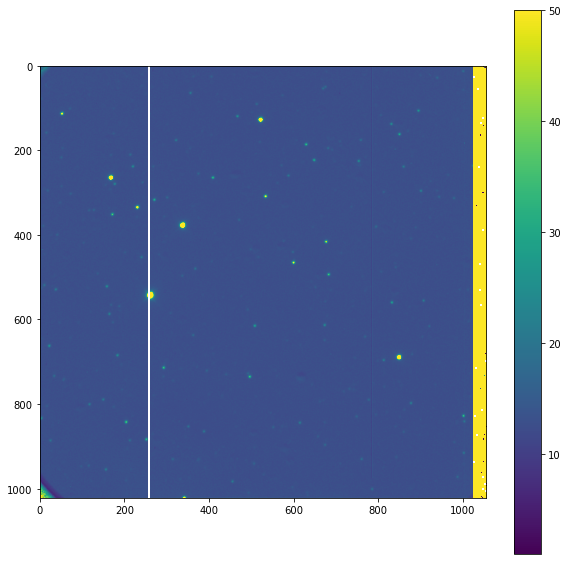

In [190]:
plt.figure(figsize=(10,10))
im=plt.imshow(landolt_V,vmin=1,vmax=50)
plt.colorbar(im)

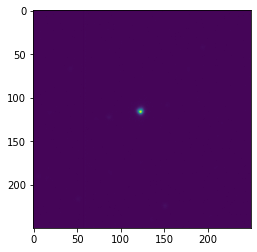

In [191]:
## analyzing star 111 1925

position = (850, 700)
size = (250, 250)     # pixels
cutout_star111_1925 = Cutout2D(landolt_V, position, size)
plt.imshow(cutout_star111_1925.data)

In [192]:
mean, median, std = sigma_clipped_stats(cutout_star111_1925.data, sigma=3.0) 
#print((mean, median, std))  

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(cutout_star111_1925.data - median)  

In [193]:
for col in sources.colnames:  
     sources[col].info.format = '%.8g'  # for consistent table output
        
print(sources)

 id xcentroid ycentroid sharpness  ... sky    peak      flux       mag     
--- --------- --------- ---------- ... --- --------- --------- ------------
  1 194.27388 42.287787 0.63878269 ...   0 5.7000802  1.344303   -0.3212429
  2 42.584049 66.957497 0.42251672 ...   0 4.4426495 1.0170377 -0.018342651
  3 153.62513   108.494 0.41319547 ...   0 3.4222872 1.0743224 -0.077836596
  4 122.82028 116.02808 0.43076879 ...   0 423.91173 97.645187   -4.9741271
  5 86.630016 122.45388 0.60866959 ...   0 11.386145 2.4655679  -0.97979243
  6  211.3992 143.90775 0.75292152 ...   0 2.4946745 1.0323776 -0.034596417
  7 208.76715 180.61075 0.45592392 ...   0 2.0237762 1.0321801 -0.034388715
  8 51.326637 216.28987 0.61090499 ...   0 6.6972521 1.6825093  -0.56489367
  9 150.95774  224.1029 0.52347966 ...   0 11.462678 2.5277274   -1.0068256


In [194]:
positions = [(122.82028, 116.02808)]

aperture = CircularAperture(positions, r=18.962962962962962)

phot_table = aperture_photometry(cutout_star111_1925.data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 122.82028 116.02808    26375.894


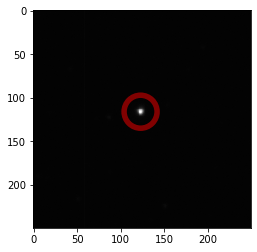

In [195]:
im=plt.imshow(cutout_star111_1925.data,cmap='Greys_r',interpolation='nearest')

aperture.plot(color='red', lw=5.5, alpha=0.5)

In [196]:
positions = [(122.82028+35, 116.02808+35)]

aperture = CircularAperture(positions, r=18.962962962962962)

phot_table = aperture_photometry(cutout_star111_1925.data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 157.82028 151.02808    14450.211


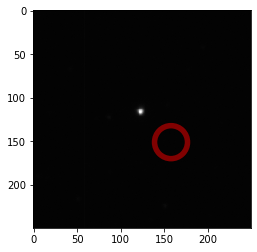

In [197]:
im=plt.imshow(cutout_star111_1925.data,cmap='Greys_r',interpolation='nearest')

aperture.plot(color='red', lw=5.5, alpha=0.5)

In [198]:
#V band mag of 111_1925 = 12.388
m_zp = 12.388 + 2.5*np.log10((26375.894-14450.211)/1.0)
print(m_zp)

22.57920815264243


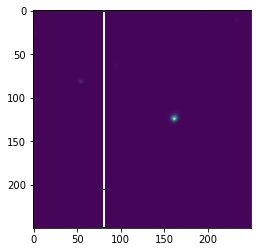

In [199]:
position = (300, 380)
size = (250, 250)     # pixels
cutout_star111_1965 = Cutout2D(landolt_V, position, size)
plt.imshow(cutout_star111_1965.data)

In [200]:
mean, median, std = sigma_clipped_stats(cutout_star111_1965.data, sigma=3.0) 
#print((mean, median, std))  

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(cutout_star111_1965.data - median)  

In [201]:
for col in sources.colnames:  
     sources[col].info.format = '%.8g'  # for consistent table output
print(sources)

 id xcentroid ycentroid sharpness  ... sky    peak      flux       mag    
--- --------- --------- ---------- ... --- --------- --------- -----------
  1 198.93959 1.4388128 0.41498794 ...   0 4.8456223 1.3373897 -0.31564494
  2 233.12326 11.017856 0.46135035 ...   0 27.607103 6.4451815  -2.0230879
  3  66.64078 22.112937  0.6454662 ...   0 4.8758201 1.1033775 -0.10681032
  4 1.3319135 25.901814  0.4370149 ...   0 13.322776 3.7052505  -1.4220439
  5 125.25658 57.831893 0.54584295 ...   0 5.7726936 1.3610359 -0.33467393
  6 94.756465 63.150729 0.49418971 ...   0 23.129997 5.8890846  -1.9251195
  7 54.470316 81.192789 0.47927069 ...   0 86.433073 18.723503  -3.1809678
  8 161.59854 124.07733 0.43518695 ...   0 913.84873 193.83988  -5.7186078
  9 64.476555 199.13427 0.51113301 ...   0 9.7822818 2.5045565 -0.99682709
 10 191.30845 226.31788 0.35430874 ...   0 7.1947216 1.9277582 -0.71263141
 11 160.86966 243.05896 0.50935346 ...   0 4.7832536 1.1721062 -0.17241742


In [202]:
positions = [(161.59584, 124.07733)]

aperture = CircularAperture(positions, r=18.962962962962962)
phot_table = aperture_photometry(cutout_star111_1965.data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)


 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 161.59584 124.07733    41439.893


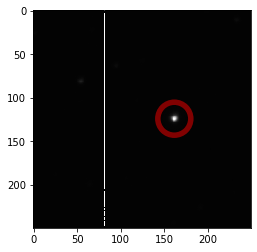

In [203]:
im=plt.imshow(cutout_star111_1965.data,cmap='Greys_r',interpolation='nearest')

aperture.plot(color='red', lw=5.5, alpha=0.5)

In [204]:
positions = [(161.59584+35, 124.07733+35)]

aperture = CircularAperture(positions, r=18.962962962962962)
phot_table = aperture_photometry(cutout_star111_1965.data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)


 id  xcenter       ycenter       aperture_sum
       pix           pix                     
--- --------- ------------------ ------------
  1 196.59584 159.07733000000002    14578.474


In [205]:
#V band mag of 111_1965 = 11.419
m_zp = 11.419 + 2.5*np.log10((41439.893-14578.474)/1.0)
print(m_zp)

22.49182237820255


In [206]:
V_zp = 0.5*(22.49182237820255+22.57920815264243)

In [207]:
print(B_zp,V_zp)

22.23328804928347 22.53551526542249


#  Working with whole Cluster

In [342]:
hdul = fits.open('cluster_B_per_sec.fits') # 30 secs
cluster_B=hdul[0].data

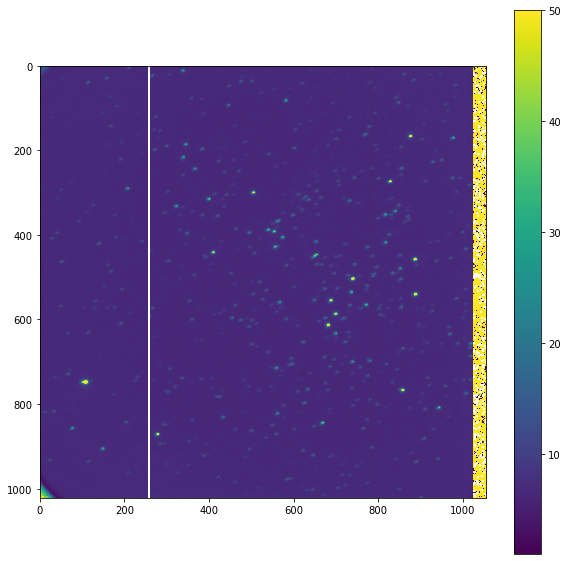

In [343]:
plt.figure(figsize=(10,10))
im=plt.imshow(cluster_B,vmin=1,vmax=50)
plt.colorbar(im)

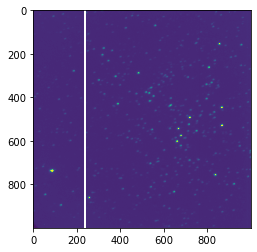

In [344]:
position = (519.54051, 512.63317)
size = (1000, 1000)     # pixels
cutout_align = Cutout2D(cluster_B, position, size)
plt.imshow(cutout_align.data,vmin=1,vmax=50)

cluster_B= cutout_align.data

In [345]:
mean, median, std = sigma_clipped_stats(cluster_B, sigma=3.0) 
#print((mean, median, std))  

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources = daofind(cluster_B - median)  

for col in sources.colnames:  
     sources[col].info.format = '%.8g'  # for consistent table output
        
print(sources)

 id  xcentroid ycentroid  sharpness  ... sky    peak      flux       mag     
---- --------- ---------- ---------- ... --- --------- --------- ------------
   1 319.31235 0.55794317  0.9225174 ...   0 28.924917 8.9255272   -2.3765847
   2 316.00583 0.80555875 0.56699241 ...   0 25.262093 9.2218301   -2.4120428
   3 928.55318  6.1138676 0.67400554 ...   0 4.2135448 1.3897306  -0.35732656
   4 841.70061  7.3361414 0.54711131 ...   0 12.077249 4.7261612   -1.6862713
   5 924.30627  7.2739434 0.50916161 ...   0 4.6275596  1.658573   -0.5493365
   6 283.15965  9.3454349 0.49621849 ...   0 5.5252983 1.7286567   -0.5942719
   7 837.60938  8.8825061 0.30109047 ...   0 5.8296399 1.8430511  -0.66384341
   8 245.19509   11.10981 0.67701864 ...   0 24.845181 8.8187033   -2.3635118
   9 459.73774  13.545653 0.54480407 ...   0 3.3758756 1.0589195 -0.062157376
  10 455.63503  15.024742 0.56427237 ...   0 3.4885746 1.4067617  -0.37055136
 ...       ...        ...        ... ... ...       ...       ...

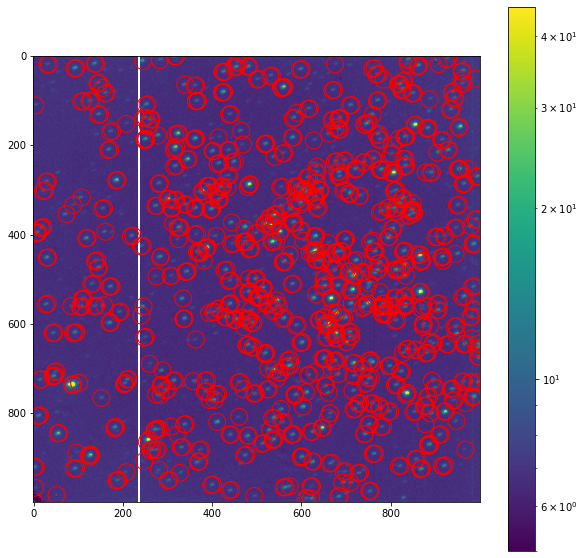

In [346]:
from matplotlib.colors import LogNorm

figure, axes = plt.subplots(figsize=(10,10))



im=axes.imshow(cluster_B,norm=LogNorm(vmin=5, vmax=45))
plt.colorbar(im)

for i in range(len(sources['xcentroid'])):
    if sources['xcentroid'][i] < 1000 :
        circle=plt.Circle((sources['xcentroid'][i], sources['ycentroid'][i]), 18.962962962962962, color='r', fill=False)
        axes.add_patch(circle)

In [347]:
B_band_phot = np.array([])
source_id = np.array([])

ct=0

for i in range(len(sources['xcentroid'])):
    
    if sources['xcentroid'][i] < 1000 :
        positions = [(sources['xcentroid'][i],sources['ycentroid'][i])]

        aperture = CircularAperture(positions, r=18.962962962962962)
        phot_table = aperture_photometry(cluster_B, aperture)
        phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
        B_band_phot = np.append(B_band_phot,phot_table['aperture_sum'][0])
        source_id= np.append(source_id,ct)
        ct+=1

In [348]:
print(ct)

1023


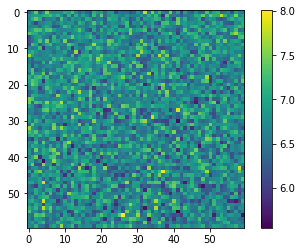

In [349]:
position = (100, 200)
size = (60, 60)     # pixels
cutout_bg = Cutout2D(cluster_B, position, size)
i=plt.imshow(cutout_bg.data)
plt.colorbar(i)

In [350]:
positions=([25,25])
aperture = CircularAperture(positions, r=18.962962962962962)
phot_table = aperture_photometry(cutout_bg.data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1    25.0    25.0    7626.4923


In [351]:
B_band_clus_bg_ct = 7626.4923

In [352]:
hdul = fits.open('cluster_V_per_sec.fits') # 30 secs
cluster_V=hdul[0].data


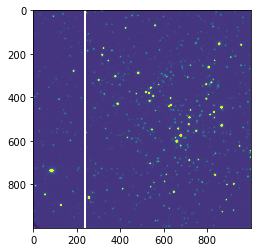

In [353]:
position = (515.32614, 517.62815)
size = (1000, 1000)     # pixels
cutout_align = Cutout2D(cluster_V, position, size)
plt.imshow(cutout_align.data,vmin=1,vmax=50)

cluster_V= cutout_align.data

In [354]:


V_band_phot = np.array([])
source_id = np.array([])
ct=0
for i in range(len(sources['xcentroid'])):
    
    if sources['xcentroid'][i] < 1000 :
        positions = [(sources['xcentroid'][i],sources['ycentroid'][i])]

        aperture = CircularAperture(positions, r=18.962962962962962)
        phot_table = aperture_photometry(cluster_V, aperture)
        phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
        V_band_phot = np.append(V_band_phot,phot_table['aperture_sum'][0])
        source_id= np.append(source_id,ct)
        ct+=1

/opt/anaconda3/lib/python3.8/site-packages/photutils/aperture/mask.py:244: RuntimeWarning: invalid value encountered in multiply
  weighted_cutout = cutout * self.data


In [355]:
print(ct)

1023


 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1    25.0    25.0    9689.6073


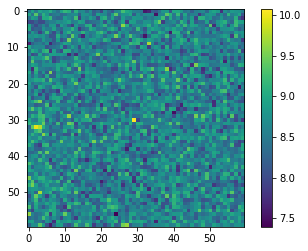

In [356]:
position = (100, 200)
size = (60, 60)     # pixels
cutout_bg = Cutout2D(cluster_V, position, size)
i=plt.imshow(cutout_bg.data)
plt.colorbar(i)

positions=([25,25])
aperture = CircularAperture(positions, r=18.962962962962962)
phot_table = aperture_photometry(cutout_bg.data, aperture)
phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table)

In [357]:
V_band_clus_bg_ct = 9689.6073

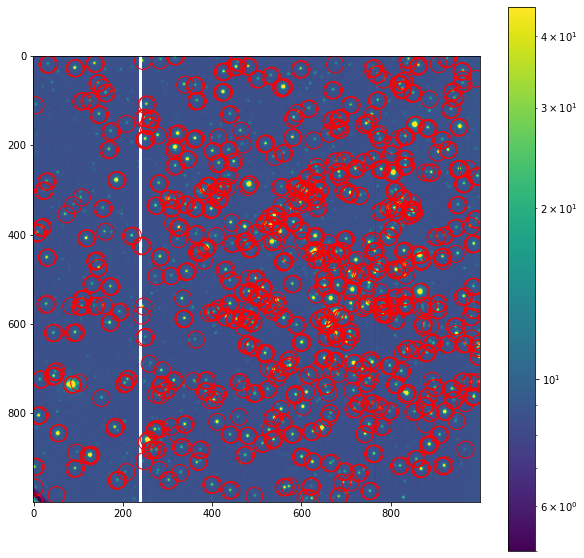

In [358]:
from matplotlib.colors import LogNorm

figure, axes = plt.subplots(figsize=(10,10))



im=axes.imshow(cluster_V,norm=LogNorm(vmin=5, vmax=45))
plt.colorbar(im)

for i in range(len(sources['xcentroid'])):
    if sources['xcentroid'][i] < 1000 :
        circle=plt.Circle((sources['xcentroid'][i], sources['ycentroid'][i]), 18.962962962962962, color='r', fill=False)
        axes.add_patch(circle)

In [359]:
V_band_cts_nobg = V_band_phot-V_band_clus_bg_ct
B_band_cts_nobg = B_band_phot-B_band_clus_bg_ct


In [360]:
b_mag = np.zeros_like(B_band_cts_nobg)
v_mag = np.zeros_like(V_band_cts_nobg)

for i in range(len(V_band_cts_nobg)):
    if B_band_cts_nobg[i] > 0 :
        b_mag[i] = -2.5*np.log10(B_band_cts_nobg[i]) + B_zp
    else :
        b_mag[i] = -1000
    
    if V_band_cts_nobg[i] > 0 :
        v_mag[i] = -2.5*np.log10(V_band_cts_nobg[i]) + V_zp
    else :
        v_mag[i] = -1000
    
    
        
    

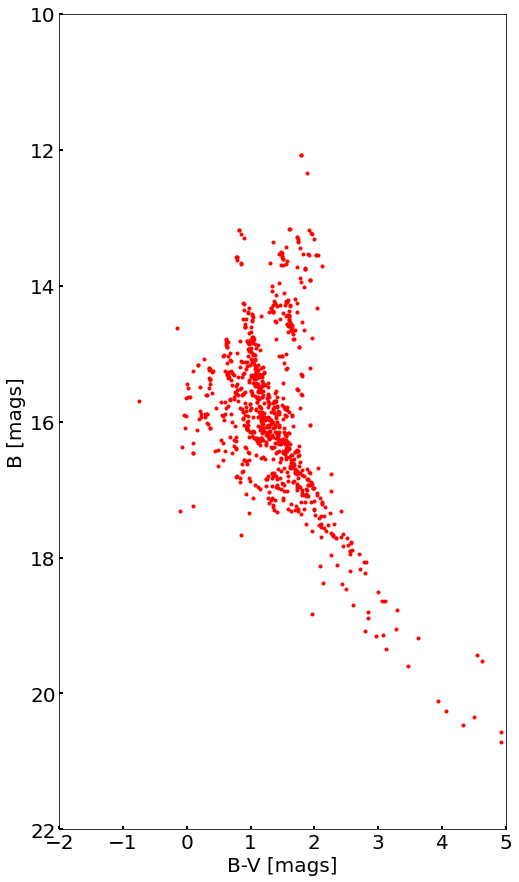

In [361]:
plt.figure(figsize=(8,15))
plt.xlim(-2,5)
plt.ylim(22,10)
plt.plot(b_mag-v_mag,b_mag,"ro",markersize=3)
plt.xlabel("B-V [mags]",fontsize=20)
plt.ylabel("B [mags]",fontsize=20)
plt.tick_params(axis='both',which='both', width=2,direction='in',labelsize=20)
plt.savefig("NGC6819.pdf",bbox_inches='tight')

In [362]:
hdu = fits.PrimaryHDU(cluster_B)
hdul = fits.HDUList([hdu])

hdul.writeto('cluster_B_per_sec_aligned.fits',overwrite=True)

In [363]:
hdu = fits.PrimaryHDU(cluster_V)
hdul = fits.HDUList([hdu])

hdul.writeto('cluster_V_per_sec_aligned.fits',overwrite=True)

In [364]:
header= 'source_id, xcentroid, ycentroid, b_mag, v_mag'
catalog_arr = np.transpose([source_id,sources['xcentroid'],sources['ycentroid'],b_mag,v_mag])
np.savetxt("catalog",catalog_arr,header=header)

# Isochrones


In [365]:

mh, age, B,V = np.loadtxt("isochrones",usecols=[1,2,29,30],unpack=True)

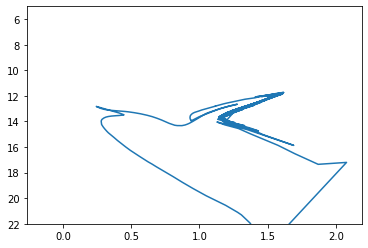

In [381]:
d=2309 #pc

wh = np.where(age == 9.10000)

#plt.plot(B[wh]-V[wh],V[wh])

Mv = V[wh] + 2.5*np.log10((d/10)**2)
Mb = B[wh] + 2.5*np.log10((d/10)**2)

plt.ylim(22,5)
plt.plot(Mb-Mv,Mb)


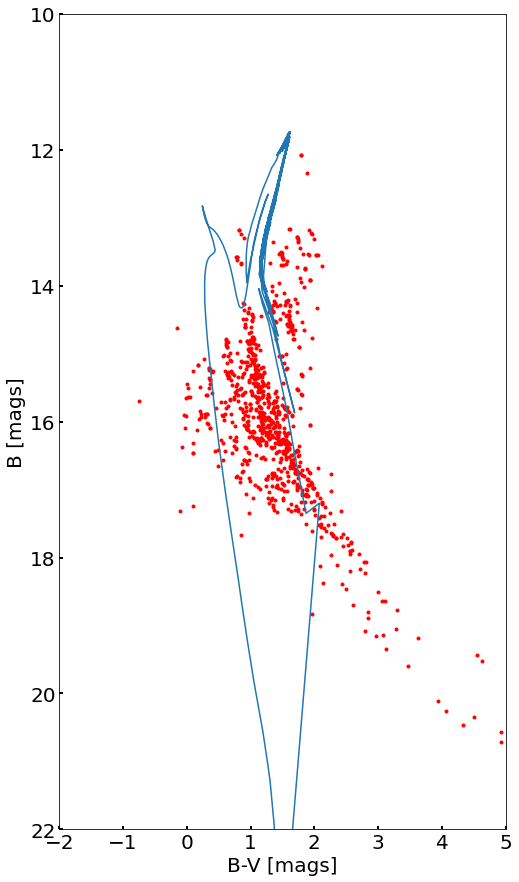

In [382]:
plt.figure(figsize=(8,15))
plt.xlim(-2,5)
plt.ylim(22,10)
plt.plot(b_mag-v_mag,b_mag,"ro",markersize=3)
plt.xlabel("B-V [mags]",fontsize=20)
plt.ylabel("B [mags]",fontsize=20)
plt.plot(Mb-Mv,Mb)
plt.tick_params(axis='both',which='both', width=2,direction='in',labelsize=20)
#plt.savefig("NGC6819.pdf",bbox_inches='tight')